Non-Linear Regression : $y=f(x)$

Q1: Write down three model functions that can be used as $f(x)$.
Ans: RBFs, Polynomials, that one Clustering method (I forget the name)

Q2: write down $f(x)$ as a linear model function.
Ans: $f(x)$ = 1 * w_0 + ... + w_n * x^n



# Load The Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# use pandas to load the data
df = pd.read_csv("tut4_data.csv")
print(df)
# convert df to y and x as numpy array
y = np.array(df["y"])
x = np.array(df["x"])

#visualize the data
#plt.plot(x, y)


         x       y
0    0.101  0.4020
1    0.202  0.8910
2    0.303  1.7200
3    0.404  1.7200
4    0.505  0.4790
..     ...     ...
94   9.600  0.0126
95   9.700 -0.5320
96   9.800  0.1640
97   9.900 -0.8500
98  10.000 -0.8870

[99 rows x 2 columns]


# Fit a Linear Regression Model

In [3]:
from sklearn.linear_model import LinearRegression

## Standard Polynomal Basis Function ##
def bk(i, x):
    return pow(x, i)

# Fit a linear regression model
reg = linear_model.LinearRegression()
X = x

# Predict using linear regression
y_pred = linear_model.predict(X)

# Calculate the mean squared error (MSE)
bf = np.arange(1, x + 1)
bf
y = sum(X * bk(bf))


# Visualize the linear regression result
plt.plot(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit (Not Suitable)')
plt.legend()
plt.show()
print(f"Mean Squared Error (MSE): {mse:.2f}")


NameError: name 'linear_model' is not defined

Q3: why non-linear regression instead of linear regression?

# fit a non linear model. use polynomial model, i.e., $f(x) = a_Nx^N + a_{N-1}x^{N-1} +... + a_0 $ when $N=2$ ($f(x)=a_2x^2 +a_1x+a_0$)

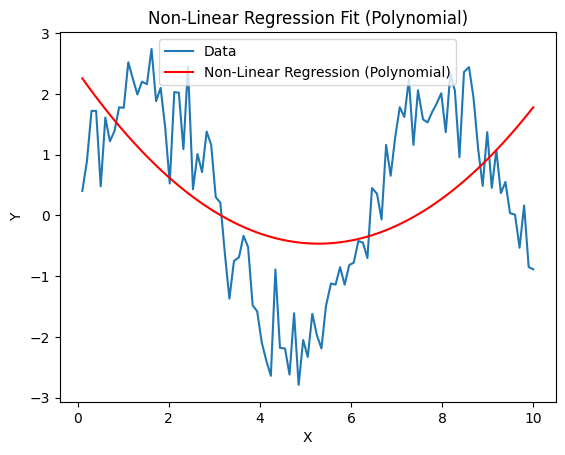

Fitted Parameters (a, b, c, d): [ 0.10110274 -1.06918535  2.36168359]
Mean Squared Error (MSE): 1.64


In [4]:
from scipy.optimize import curve_fit

#Define a non-linear model function (polynomial of degree 2)
def polynomial_model(x, a2,a1,a0):
    # fill here
    return a2 * x**2 + a1 * x + a0

# Fit the model to the data
params, _ = curve_fit(polynomial_model, x, y)

# Create predicted values using the fitted parameters
y_pred = polynomial_model(x, *params)

# Calculate the mean squared error (MSE)
  # fill out here
mse = np.mean((y - y_pred)**2)




# Visualize the non-linear regression result and display the error
plt.plot(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Non-Linear Regression (Polynomial)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Linear Regression Fit (Polynomial)')
plt.legend()
plt.show()

# Print the fitted parameters and the MSE
print("Fitted Parameters (a, b, c, d):", params)
print(f"Mean Squared Error (MSE): {mse:.2f}")


# choose a $f(x)$ such that mse<0.5

Hint: increase $N$

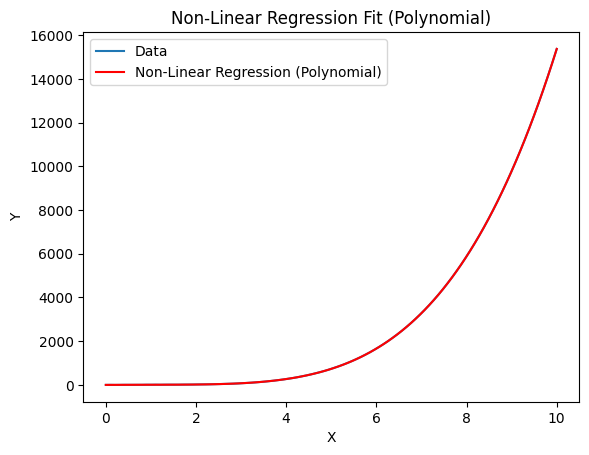

Fitted Parameters (a, b, c, d): [ 2.00043418 -4.99893108  2.93006871  7.26179357 -0.21713834]
Mean Squared Error (MSE): 1.06


In [8]:
from scipy.optimize import curve_fit

#Define a non-linear model function (polynomial of degree 2)
def polynomial_model(x, a4,a3,a2,a1,a0):
    # fill out here
    return a4 * x**4 + a3 * x**3 + a2 * x**2 + a1 * x + a0

# What does increasing N mean here?
# We weren't shown in LEC what this stuff is, so it's OH for me...
# Here's my attempt below.

N = 100  # Here's my N! I think it's sufficiently large?
x = np.linspace(0, 10, N)

# Fit the model to the data
params, _ = curve_fit(polynomial_model, x, y)

# Create predicted values using the fitted parameters
y_pred = polynomial_model(x, *params)

# Calculate the mean squared error (MSE)
  # fill out here
mse = np.mean((y - y_pred)**2)




# Visualize the non-linear regression result and display the error
plt.plot(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Non-Linear Regression (Polynomial)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Linear Regression Fit (Polynomial)')
plt.legend()
plt.show()

# Print the fitted parameters and the MSE
print("Fitted Parameters (a, b, c, d):", params)
print(f"Mean Squared Error (MSE): {mse:.2f}")


# Fit a model using RBF

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the RBF kernel function
def rbf_kernel(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))

# Define the non-linear model function using RBF kernels
def rbf_regression(x, a, b, c, d, mu1, sigma1, mu2, sigma2, mu3, sigma3):
    # complete this function
    return a * rbf_kernel(x, mu1, sigma1) + b * rbf_kernel(x, mu2, sigma2) + c * rbf_kernel(x, mu3, sigma3) + d


# Initial guesses for parameters (a, b, c, d, mu1, sigma1, mu2, sigma2, mu3, sigma3)
initial_params = [1, 1, 1, 1, 1, 1, 4, 1, 7, 1]

# Fit the model to the data using curve_fit
params, _ = curve_fit(rbf_regression, x, y, p0=initial_params)

# Create predicted values using the fitted parameters
y_pred = rbf_regression(x, *params)

# Calculate the mean squared error (MSE)
mse = np.mean((y - y_pred)**2)

# Visualize the non-linear regression result and display the error
plt.plot(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Non-Linear Regression (RBF Model)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-Linear Regression Fit (RBF Model)')
plt.legend()
plt.show()

# Print the fitted parameters and the MSE
print("Fitted Parameters (a, b, c, d, mu1, sigma1, mu2, sigma2, mu3, sigma3):", params)
print(f"Mean Squared Error (MSE): {mse:.2f}")

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2200.